# Genomics Machine Learning Model For Pathogens

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import Bio
from Bio import SeqIO
import squiggle
import squigglepy
import seaborn as sns
import scipy.stats as ss
from pathlib import Path 
import warnings
warnings.filterwarnings('ignore')

In [3]:
con_path = '/Users/aaliyahdavy/Documents/Data_Science_Portfolio/Genomics/genomics_data/control.csv'
orig_path = '/Users/aaliyahdavy/Documents/Data_Science_Portfolio/Genomics/genomics_data/CNEO_orig_sequence.csv'
grubii_path = '/Users/aaliyahdavy/Documents/Data_Science_Portfolio/Genomics/genomics_data/CNEO_var_grubii_sequence.csv'
XL280_path = '/Users/aaliyahdavy/Documents/Data_Science_Portfolio/Genomics/genomics_data/CNEO_XL280_chr4_sequence.csv'
H99_path = '/Users/aaliyahdavy/Documents/Data_Science_Portfolio/Genomics/genomics_data/CNEO_H99_mitochondria_sequence.csv'

# Our Strains At A Glance

In [115]:
con_df = pd.read_csv(con_path) #formatting control
con_df = con_df.drop('Y', axis=1)
df_con = pd.DataFrame(con_df.loc[0])
df_con.reset_index(inplace=True)
con_df = df_con
con_df = con_df.replace({'DNA':'CONTROL'}, regex=True)
con_df = con_df.drop(index=0,axis=0)
con_df.rename(columns={'index':'id',0:'seq'}, inplace=True)
con_df

,id,seq
1,CONTROL,CCTACTCTAAAGAGATTTGCAGTTGCGATGAGAAGCTTACCTCGAG...


In [5]:
orig_df = pd.read_csv(orig_path) #formatting CNEO (original strain)
orig_df.reset_index(inplace=True)
orig_df = orig_df.drop('index', axis=1)
orig_df = orig_df.replace({'whole genome shotgun sequence':'CNEO'}, regex=True)
orig_df

,id,seq
0,CNEO,GAATTCTAAAACAGTTGCATTCTATAATTACAAAATAATTGAAACA...


In [6]:
grubii_df = pd.read_csv(grubii_path) #formatting CNEO (original strain)
grubii_df.reset_index(inplace=True)
grubii_df = grubii_df.drop('index', axis=1)
grubii_df = grubii_df.replace({'whole genome shotgun sequence':'GRUBII'}, regex=True)
grubii_df

,id,seq
0,GRUBII,TCCTCCGACACCACGCCAGGTCCATGCCGAACCAGTTGCGTGCTCC...


In [7]:
XL280_df = pd.read_csv(XL280_path) #formatting CNEO (original strain)
XL280_df.reset_index(inplace=True)
XL280_df = XL280_df.drop('index', axis=1)
XL280_df = XL280_df.replace({'whole genome shotgun sequence':'XL280'}, regex=True)
XL280_df

,id,seq
0,XL280,TAACCCCCTAACCCCCTAACCCCCTAACCCCCTAACCCCCTAACCC...


In [8]:
H99_df = pd.read_csv(H99_path) #formatting CNEO (original strain)
H99_df.reset_index(inplace=True)
H99_df = H99_df.drop('index', axis=1)
H99_df = H99_df.replace({'complete genome':'H99'}, regex=True)
H99_df

,id,seq
0,H99,ATTAAAAATATCATAAAAAATGGCTATTCTAACATCACTATATAAT...


In [9]:
ALL_df = pd.DataFrame(data=(con_df))
ALL1_df = pd.concat([grubii_df,orig_df]) 
ALL2_df = pd.concat([XL280_df, H99_df]) 
ALL_df = pd.concat([ALL_df,ALL1_df ]) 
ALL_df = pd.concat([ALL_df,ALL2_df ]) 
idx = [0,1,2,3,4]
ALL_df['index'] = idx
ALL_df.set_index('index')

,id,seq
index,,
0,CONTROL,CCTACTCTAAAGAGATTTGCAGTTGCGATGAGAAGCTTACCTCGAG...
1,GRUBII,TCCTCCGACACCACGCCAGGTCCATGCCGAACCAGTTGCGTGCTCC...
2,CNEO,GAATTCTAAAACAGTTGCATTCTATAATTACAAAATAATTGAAACA...
3,XL280,TAACCCCCTAACCCCCTAACCCCCTAACCCCCTAACCCCCTAACCC...
4,H99,ATTAAAAATATCATAAAAAATGGCTATTCTAACATCACTATATAAT...


# Prep For Visualization

In [12]:
filepath = Path('/Users/aaliyahdavy/Documents/Data_Science_Portfolio/Genomics/genomics_data/ALL_df.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
ALL_df.to_csv(filepath)

In [191]:
con_dfa = con_df.to_numpy()
con_dfa[:,:]

array([['CONTROL',
        'CCTACTCTAAAGAGATTTGCAGTTGCGATGAGAAGCTTACCTCGAGAACCTAGTATGATGGAATTCATTGAAAGAACGTGATAAAAGTGAGATCCAATGGAATTATGAACGTTCAATTAACCGAAAATAAAGCTGCTAATGTTCTATTC']],
      dtype=object)

In [117]:
for sequence in SeqIO.parse(con_path, 'fasta'):
    con_seq_id = sequence.id
    con_seq = sequence.seq
    con_len_seq = len(sequence)

In [201]:
for sequence in SeqIO.parse(orig_path, 'fasta'):
    orig_seq_id = sequence.id
    orig_seq = sequence.seq
    orig_len_seq = len(sequence)

In [198]:
for sequence in SeqIO.parse(grubii_path, 'fasta'):
    grubii_seq_id = sequence.id
    grubii_seq = sequence.seq
    grubii_len_seq = len(sequence)

In [199]:
for sequence in SeqIO.parse(XL280_path, 'fasta'):
    XL280_seq_id = sequence.id
    XL280_seq = sequence.seq
    XL280_len_seq = len(sequence)

In [200]:
for sequence in SeqIO.parse(H99_path, 'fasta'):
    H99_seq_id = sequence.id
    H99_seq = sequence.seq
    H99_len_seq = len(sequence)

In [18]:
ALL_path = '/Users/aaliyahdavy/Documents/Data_Science_Portfolio/Genomics/genomics_data/ALL_df.fasta'
for sequence in SeqIO.parse(ALL_path, 'fasta'):
    ALL_seq_id = sequence.id
    ALL_seq = sequence.seq
    ALL_len_seq = len(sequence)

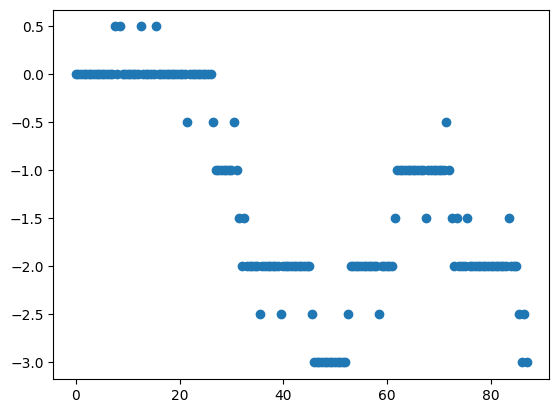

   0    1    2    3    4    5    6    7    8    9    ...   165   166   167   
0  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  ...  82.5  83.0  83.5  \
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  -2.0  -2.0  -1.5   

    168   169   170   171   172   173   174  
0  84.0  84.5  85.0  85.5  86.0  86.5  87.0  
1  -2.0  -2.0  -2.0  -2.5  -3.0  -2.5  -3.0  

[2 rows x 175 columns]


In [104]:
sq_ALL = squiggle.squiggle.transform(ALL_path, bar=False) # converts DNA sequences to vectors
x_ALL = sq_ALL[0]
y_ALL = sq_ALL[1]
plt.scatter(x_ALL,y_ALL)
plt.show()

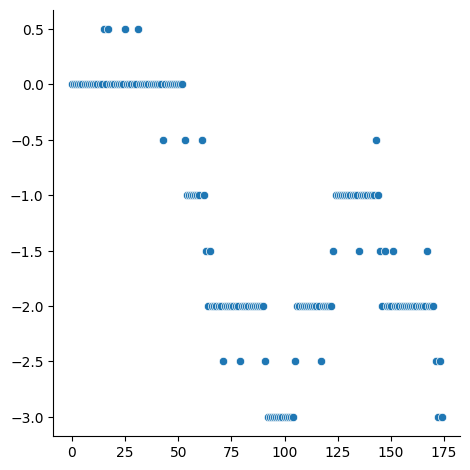

In [23]:
sns.relplot(ALL_y) # demonstrating what Squiggle does in terms of graphing 
plt.show()     # (but Squiggle also allows you to travel the vectors it creates of your DNA)

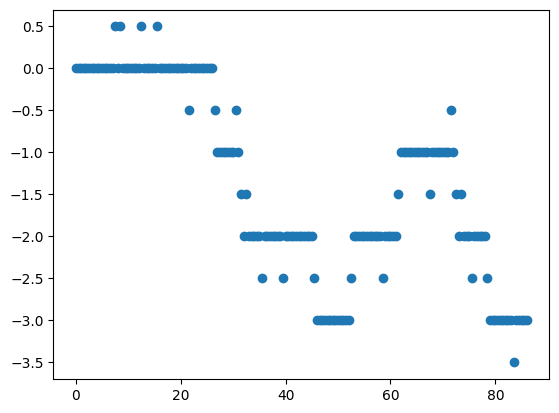

In [20]:
sq_con = squiggle.squiggle.transform(con_path, bar=False) 
x_con = sq_con[0]
y_con = sq_con[1]
plt.scatter(x_con,y_con)
plt.show()

In [105]:
sq_orig = squiggle.squiggle.transform(orig_path, bar=False)
x_orig = sq_orig[0]
y_orig = sq_orig[1]
sq_grubii = squiggle.squiggle.transform(grubii_path, bar=False)
x_grubii = sq_grubii[0]
y_grubii = sq_grubii[1]
sq_H99 = squiggle.squiggle.transform(H99_path, bar=False)
x_H99 = sq_H99[0]
y_H99 = sq_H99[1]
sq_XL280 = squiggle.squiggle.transform(XL280_path, bar=False)
x_XL280 = sq_XL280[0]

# CORRELATION MATRICES FOR EACH STRAIN:

In [93]:
y_orig_rz = y_orig[0:173]
print('Control vs CNEO\n',np.corrcoef(y_con,y_orig_rz))
y_grubii_rz = y_grubii[0:173]
print('\nControl vs GRUBII\n',np.corrcoef(y_con,y_orig_rz))
y_H99_rz = y_H99[0:173]
print('\nControl vs H99\n',np.corrcoef(y_con,y_orig_rz))
y_XL280_rz = y_XL280[0:173]
print('\nControl vs XL280\n',np.corrcoef(y_con,y_orig_rz))
y_ALL_rz = y_ALL[0:173]
print('\nControl vs ALL (which includes control)\n',np.corrcoef(y_con,y_ALL_rz))

Control vs CNEO
 [[1.         0.92677091]
 [0.92677091 1.        ]]

Control vs GRUBII
 [[1.         0.92677091]
 [0.92677091 1.        ]]

Control vs H99
 [[1.         0.92677091]
 [0.92677091 1.        ]]

Control vs XL280
 [[1.         0.92677091]
 [0.92677091 1.        ]]

Control vs ALL (which includes control)
 [[1.         0.96358145]
 [0.96358145 1.        ]]


In [78]:
y_grubii_rz = y_grubii[0:195]
print('CNEO vs GRUBII\n',np.corrcoef(y_orig,y_grubii_rz))
y_H99_rz = y_H99[0:195]
print('\nCNEO vs H99\n',np.corrcoef(y_orig,y_H99_rz))
y_XL280_rz = y_XL280[0:195]
print('\nCNEO vs XL280\n',np.corrcoef(y_orig,y_XL280_rz))
y_orig_rz = y_orig[0:175]
print('\nCNEO vs ALL\n',np.corrcoef(y_orig_rz,y_ALL))

CNEO vs GRUBII
 [[1.         0.99360374]
 [0.99360374 1.        ]]

CNEO vs H99
 [[1.         0.82169058]
 [0.82169058 1.        ]]

CNEO vs XL280
 [[1.         0.93668579]
 [0.93668579 1.        ]]

CNEO vs ALL
 [[1.         0.95543891]
 [0.95543891 1.        ]]


In [85]:
y_H99_rz = y_H99[0:207]
print('GRUBII vs H99\n',np.corrcoef(y_grubii,y_H99_rz))
print('\nGRUBII vs XL280\n',np.corrcoef(y_grubii,y_XL280))
y_grubii_rz = y_grubii[0:175]
print('\nGRUBII vs ALL\n',np.corrcoef(y_grubii_rz,y_ALL))

GRUBII vs H99
 [[1.         0.76160227]
 [0.76160227 1.        ]]

GRUBII vs XL280
 [[1.         0.91607449]
 [0.91607449 1.        ]]

GRUBII vs ALL
 [[1.         0.95856702]
 [0.95856702 1.        ]]


In [91]:
y_H99_rz = y_H99[0:207]
print('H99 vs XL280\n',np.corrcoef(y_H99_rz,y_XL280))
y_H99_rz2 = y_H99[0:175]
print('\nH99 vs ALL\n',np.corrcoef(y_H99_rz2,y_ALL))

H99 vs XL280
 [[1.         0.95087699]
 [0.95087699 1.        ]]

H99 vs ALL
 [[1.         0.99315634]
 [0.99315634 1.        ]]


In [86]:
print('\nXL280 vs ALL\n',np.corrcoef(y_grubii,y_XL280))


XL280 vs ALL
 [[1.         0.91607449]
 [0.91607449 1.        ]]


For convenience: all corrcoeff's 
(y_con,y_orig_rz)
(y_con,y_orig_rz)
(y_con,y_orig_rz)
(y_con,y_orig_rz)
(y_con,y_ALL_rz)
(y_orig,y_grubii_rz)
(y_orig,y_H99_rz)
(y_orig,y_XL280_rz)
(y_orig_rz,y_ALL)
(y_grubii,y_H99_rz)
(y_grubii,y_XL280)
(y_grubii_rz,y_ALL)
(y_H99_rz,y_XL280)
(y_H99_rz2,y_ALL)
(y_grubii,y_XL280)


In [110]:
import numpy as np
import re
def string_to_array(seq_string):
   seq_string = seq_string.lower()
   seq_string = re.sub('[^acgt]', 'n', seq_string)
   seq_string = np.array(list(seq_string))
   return seq_string
# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','c','g','t','z']))

LabelEncoder()

In [111]:
def ordinal_encoder(my_array):
   integer_encoded = label_encoder.transform(my_array)
   float_encoded = integer_encoded.astype(float)
   float_encoded[float_encoded == 0] = 0.25 # A
   float_encoded[float_encoded == 1] = 0.50 # C
   float_encoded[float_encoded == 2] = 0.75 # G
   float_encoded[float_encoded == 3] = 1.00 # T
   float_encoded[float_encoded == 4] = 0.00 # anything else, lets say n
   return float_encoded

In [57]:
ordinal_encoder(string_to_array(str0))

array([0.5 , 0.5 , 1.  , 0.25, 0.5 , 1.  , 0.5 , 1.  , 0.25, 0.25, 0.25,
       0.75, 0.25, 0.75, 0.25, 1.  , 1.  , 1.  , 0.75, 0.5 , 0.25, 0.75,
       1.  , 1.  , 0.75, 0.5 , 0.75, 0.25, 1.  , 0.75, 0.25, 0.75, 0.25,
       0.25, 0.75, 0.5 , 1.  , 1.  , 0.25, 0.5 , 0.5 , 1.  , 0.5 , 0.75,
       0.25, 0.75, 0.25, 0.25, 0.5 , 0.5 , 1.  , 0.25, 0.75, 1.  , 0.25,
       1.  , 0.75, 0.25, 1.  , 0.75, 0.75, 0.25, 0.25, 1.  , 1.  , 0.5 ,
       0.25, 1.  , 1.  , 0.75, 0.25, 0.25, 0.25, 0.75, 0.25, 0.25, 0.5 ,
       0.75, 1.  , 0.75, 0.25, 1.  , 0.25, 0.25, 0.25, 0.25, 0.75, 1.  ,
       0.75, 0.25, 0.75, 0.25, 1.  , 0.5 , 0.5 , 0.25, 0.25, 1.  , 0.75,
       0.75, 0.25, 0.25, 1.  , 1.  , 0.25, 1.  , 0.75, 0.25, 0.25, 0.5 ,
       0.75, 1.  , 1.  , 0.5 , 0.25, 0.25, 1.  , 1.  , 0.25, 0.25, 0.5 ,
       0.5 , 0.75, 0.25, 0.25, 0.25, 0.25, 1.  , 0.25, 0.25, 0.25, 0.75,
       0.5 , 1.  , 0.75, 0.5 , 1.  , 0.25, 0.25, 1.  , 0.75, 1.  , 1.  ,
       0.5 , 1.  , 0.25, 1.  , 1.  , 0.5 ])

# Create Function For Model

In [113]:
def Kmers_funct(seq, size):
   return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [ ]:
con_seq = con_df.iloc[0,1]
k_con_seq = Kmers_funct(con_seq,size=4)
pd.DataFrame(k_con_seq)

orig_seq = orig_df.iloc[0,1]
k_orig_seq = Kmers_funct(orig_seq,size=4)
pd.DataFrame(k_orig_seq)

grubii_seq = grubii_df.iloc[0,1]
k_grubii_seq = Kmers_funct(grubii_seq,size=4)
pd.DataFrame(k_grubii_seq)

H99_seq = H99_df.iloc[0,1]
k_H99_seq = Kmers_funct(H99_seq,size=4)
pd.DataFrame(k_H99_seq)

XL280_seq = XL280_df.iloc[0,1]
k_XL280_seq = Kmers_funct(XL280_seq,size=4)
pd.DataFrame(k_XL280_seq)

In [220]:
k_con_df = con_df
k_con_df['words'] = k_con_df.apply(lambda x: Kmers_funct(x['seq'],size=6), axis=1)
k_con_df = k_con_df.drop('seq', axis=1)
print(k_con_df.head())

k_orig_df = orig_df
k_orig_df['words'] = k_orig_df.apply(lambda x: Kmers_funct(x['seq'],size=6), axis=1)
k_orig_df = k_orig_df.drop('seq', axis=1)
print(k_orig_df.head())

k_grubii_df = grubii_df
k_grubii_df['words'] = k_grubii_df.apply(lambda x: Kmers_funct(x['seq'],size=6), axis=1)
k_grubii_df = k_grubii_df.drop('seq', axis=1)
print(k_grubii_df.head())

k_H99_df = H99_df
k_H99_df['words'] = k_H99_df.apply(lambda x: Kmers_funct(x['seq'],size=6), axis=1)
k_H99_df = k_H99_df.drop('seq', axis=1)
print(k_H99_df.head())

k_XL280_df = XL280_df
k_XL280_df['words'] = k_XL280_df.apply(lambda x: Kmers_funct(x['seq'],size=6), axis=1)
k_XL280_df = k_XL280_df.drop('seq', axis=1)
print(k_XL280_df.head())

        id                                              words
1  CONTROL  [cctact, ctactc, tactct, actcta, ctctaa, tctaa...
      id                                              words
0   CNEO  [gaattc, aattct, attcta, ttctaa, tctaaa, ctaaa...
        id                                              words
0   GRUBII  [tcctcc, cctccg, ctccga, tccgac, ccgaca, cgaca...
     id                                              words
0   H99  [attaaa, ttaaaa, taaaaa, aaaaat, aaaata, aaata...
       id                                              words
0   XL280  [taaccc, aacccc, accccc, ccccct, ccccta, cccta...


In [200]:
import random

k_con_texts = list(k_con_df['words'])
for item in range(len(k_con_texts)):
   k_con_texts[item] = ' '.join(k_con_texts[item])
k_y_con = np.random.randint(1,10,size=141)

k_orig_texts = list(k_orig_df['words'])
for item in range(len(k_orig_texts)):
   k_orig_texts[item] = ' '.join(k_orig_texts[item])
k_y_orig = np.random.randint(1,10,size=141)

k_grubii_texts = list(k_grubii_df['words'])
for item in range(len(k_grubii_texts)):
   k_grubii_texts[item] = ' '.join(k_grubii_texts[item])
k_y_grubii = np.random.randint(1,10,size=141)

k_H99_texts = list(k_H99_df['words'])
for item in range(len(k_H99_texts)):
   k_H99_texts[item] = ' '.join(k_H99_texts[item])
k_y_H99 = np.random.randint(1,10,size=141)

k_XL280_texts = list(k_XL280_df['words'])
for item in range(len(k_XL280_texts)):
   k_XL280_texts[item] = ' '.join(k_XL280_texts[item])
k_y_XL280 = np.random.randint(1,10,size=141)

In [225]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing
k_X_con = cv.fit_transform(k_con_texts)
k_X_orig = cv.transform(k_orig_texts)
k_X_grubii = cv.transform(k_grubii_texts)
k_X_H99 = cv.transform(k_H99_texts)
k_X_XL280 = cv.transform(k_XL280_texts)

# Check shape of X's and Y's

In [202]:
print(k_X_con.shape)
print(k_X_orig.shape)
print(k_X_grubii.shape)
print(k_X_H99.shape)
print(k_X_XL280.shape)

print(k_y_con.shape)
print(k_y_orig.shape)
print(k_y_grubii.shape)
print(k_y_H99.shape)
print(k_y_XL280.shape)

(1, 141)
(1, 141)
(1, 141)
(1, 141)
(1, 141)
(141,)
(141,)
(141,)
(141,)
(141,)


# Transpose the X's to match the Y's

In [230]:
k_X_con = k_X_con.transpose()
print(k_X_con.shape)
k_X_orig = k_X_orig.transpose()
print(k_X_orig.shape)
k_X_grubii = k_X_grubii.transpose()
print(k_X_grubii.shape)
k_X_H99 = k_X_H99.transpose()
print(k_X_H99.shape)
k_X_XL280 = k_X_XL280.transpose()
print(k_X_XL280.shape)

(141, 1)
(141, 1)
(141, 1)
(141, 1)
(141, 1)


# Split to Train and Test, then Build Model

In [221]:
from sklearn.model_selection import train_test_split

con_X_train, con_X_test, con_y_train, con_y_test = train_test_split(k_X_con, 
                                                                    k_y_con, 
                                                                    test_size = 0.20,
                                                                    random_state=42)
                                                   
### Multinomial Naive Bayes Classifier ###
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.2)
classifier.fit(con_X_train, con_y_train)

MultinomialNB(alpha=0.2)

In [222]:
con_y_pred = classifier.predict(con_X_test)

In [223]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Confusion matrix for predictions on Control DNA sequence\n")

print(pd.crosstab(pd.Series(con_y_test, name='Actual'), pd.Series(con_y_pred, name='Predicted')))

def get_metrics(con_y_test, con_y_predicted):
   accuracy = accuracy_score(con_y_test, con_y_predicted)
   precision = precision_score(con_y_test, con_y_predicted, average='weighted')
   recall = recall_score(con_y_test, con_y_predicted, average='weighted')
   f1 = f1_score(con_y_test, con_y_predicted, average='weighted')
   return accuracy, precision, recall, f1
   
accuracy, precision, recall, f1 = get_metrics(con_y_test, con_y_pred)

print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on Control DNA sequence

Predicted  5
Actual      
1          4
2          1
3          5
4          5
5          5
6          2
7          3
9          4
accuracy = 0.172 
precision = 0.030 
recall = 0.172 
f1 = 0.051


# Predict The Other Strains

In [231]:
y_pred_orig = classifier.predict(k_X_orig)
print("Confusion matrix for predictions on CNEO DNA sequence\n")
print(pd.crosstab(pd.Series(k_y_orig, name='Actual'), pd.Series(y_pred_orig, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(k_y_orig, y_pred_orig)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on CNEO DNA sequence

Predicted   5
Actual       
1          14
2          19
3          15
4          22
5           9
6          11
7          18
8          14
9          19
accuracy = 0.064 
precision = 0.004 
recall = 0.064 
f1 = 0.008


In [232]:
y_pred_grubii = classifier.predict(k_X_grubii)
print("Confusion matrix for predictions on GRUBII DNA sequence\n")
print(pd.crosstab(pd.Series(k_y_grubii, name='Actual'), pd.Series(y_pred_grubii, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(k_y_grubii, y_pred_grubii)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on GRUBII DNA sequence

Predicted   5
Actual       
1          20
2          16
3          14
4          26
5          13
6          13
7          11
8          12
9          16
accuracy = 0.092 
precision = 0.009 
recall = 0.092 
f1 = 0.016


In [233]:
y_pred_H99 = classifier.predict(k_X_H99)
print("Confusion matrix for predictions on H99 DNA sequence\n")
print(pd.crosstab(pd.Series(k_y_H99, name='Actual'), pd.Series(y_pred_H99, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(k_y_H99, y_pred_H99)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on H99 DNA sequence

Predicted   5
Actual       
1          12
2          21
3          16
4          13
5          15
6          19
7          20
8           9
9          16
accuracy = 0.106 
precision = 0.011 
recall = 0.106 
f1 = 0.020


In [234]:
y_pred_XL280 = classifier.predict(k_X_XL280)
print("Confusion matrix for predictions on XL280 DNA sequence\n")
print(pd.crosstab(pd.Series(k_y_XL280, name='Actual'), pd.Series(y_pred_XL280, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(k_y_XL280, y_pred_XL280)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on XL280 DNA sequence

Predicted   5
Actual       
1          15
2          13
3          19
4          14
5          19
6          16
7          14
8          19
9          12
accuracy = 0.135 
precision = 0.018 
recall = 0.135 
f1 = 0.032


# Citations:

- @inproceedings{ren2019likelihood,
  title={Likelihood ratios for out-of-distribution detection},
  author={Ren, Jie and
  Liu, Peter J and
  Fertig, Emily and
  Snoek, Jasper and
  Poplin, Ryan and
  Depristo, Mark and
  Dillon, Joshua and
  Lakshminarayanan, Balaji},
  booktitle={Advances in Neural Information Processing Systems},
  pages={14707--14718},
  year={2019}
}
- AUTHORS   Parra,C.M.
    - TITLE     Genome sequencing and assembly of 29 Colombian clinical isolates of
            Cryptococcus neoformans
- AUTHORS   Boyce,K.
    - TITLE     Molecular mechanisms underlying the emergence of polygenetic
            antifungal drug resistance in Cryptococcus
- AUTHORS   Janbon,G., Ormerod,K.L., Paulet,D., Byrnes,E.J. III, Yadav,V.,
            Chatterjee,G., Mullapudi,N., Hon,C.C., Billmyre,R.B., Brunel,F.,
            Bahn,Y.S., Chen,W., Chen,Y., Chow,E.W., Coppee,J.Y.,
            Floyd-Averette,A., Gaillardin,C., Gerik,K.J., Goldberg,J.,
            Gonzalez-Hilarion,S., Gujja,S., Hamlin,J.L., Hsueh,Y.P., Ianiri,G.,
            Jones,S., Kodira,C.D., Kozubowski,L., Lam,W., Marra,M.,
            Mesner,L.D., Mieczkowski,P.A., Moyrand,F., Nielsen,K., Proux,C.,
            Rossignol,T., Schein,J.E., Sun,S., Wollschlaeger,C., Wood,I.A.,
            Zeng,Q., Neuveglise,C., Newlon,C.S., Perfect,J.R., Lodge,J.K.,
            Idnurm,A., Stajich,J.E., Kronstad,J.W., Sanyal,K., Heitman,J.,
            Fraser,J.A., Cuomo,C.A. and Dietrich,F.S.
    - TITLE     Analysis of the Genome and Transcriptome of Cryptococcus neoformans
            var. grubii Reveals Complex RNA Expression and Microevolution
            Leading to Virulence Attenuation
    - JOURNAL   PLoS Genet. 10 (4), E1004261 (2014)
- AUTHORS   Ni,M., Feretzaki,M., Li,W., Floyd-Averette,A., Mieczkowski,P.,
            Dietrich,F.S. and Heitman,J.
     - TITLE     Unisexual and heterosexual meiotic reproduction generate aneuploidy
            and phenotypic diversity de novo in the yeast Cryptococcus
            neoformans
     - JOURNAL   PLoS Biol. 11 (9), E1001653 (2013)
     - PUBMED   24058295
     - REFERENCE   2  (bases 1 to 1783052)
- AUTHORS   Ni,M., Li,W., Floyd-Averette,A., Mieczkowski,P., Dietrich,F.S. and
            Heitman,J.
     - TITLE     Direct Submission
     - JOURNAL   Submitted (13-FEB-2013) Molecular Genetics and Microbiology, Duke
            University, 213 Research Dr. CARL Bldg., Room 315, Durham, NC
            27710, USA
- NAGESH SINGH CHAUHAN, https://github.com/nageshsinghc4/DNA-Sequence-Machine-learning.git
            